## I. Perkenalan
Nama        : Fadhilah Amani Alam Aulia

Batch       : 15

Dataset     : Census Adult Income

Query       : 

    SELECT age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income_bracket
    FROM `bigquery-public-data.ml_datasets.census_adult_income`
    WHERE workclass != ' ?' AND hours_per_week < 100 LIMIT 19970

Objective   : Memprediksi `income bracket` menggunakan dataset yang sudah disimpan.

## II. Import Libraries

In [206]:
# Mengimport library yang dibutuhkan

import joblib
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

## III. Data Loading


In [2]:
# Mengakses dataset

data = pd.read_csv('h8dsft_P1G2_fadhilah_amani_alam_aulia.csv')
data

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,35,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
19966,42,Private,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K
19967,38,Federal-gov,HS-grad,9,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
19968,42,Private,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Male,0,0,48,United-States,<=50K


In [3]:
# Menampikan 10 baris pertama pada data

data.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
5,30,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,Portugal,<=50K
6,46,Self-emp-inc,9th,5,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,50,United-States,<=50K
7,28,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,<=50K
8,37,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
9,40,Local-gov,9th,5,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,Yugoslavia,>50K


In [4]:
# Menampikan 10 baris terakhir pada data

data.tail(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
19960,35,State-gov,HS-grad,9,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
19961,35,Federal-gov,HS-grad,9,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
19962,37,Private,HS-grad,9,Divorced,Farming-fishing,Unmarried,White,Male,0,0,45,United-States,<=50K
19963,47,Private,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
19964,22,Private,HS-grad,9,Never-married,Other-service,Unmarried,Other,Male,0,0,20,Puerto-Rico,<=50K
19965,35,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
19966,42,Private,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K
19967,38,Federal-gov,HS-grad,9,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
19968,42,Private,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Male,0,0,48,United-States,<=50K
19969,34,Private,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
# Mengganti nama kolom 'sex' menjadi 'gender'

data.rename(columns={'sex': 'gender'}, inplace=True)
data

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,35,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
19966,42,Private,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K
19967,38,Federal-gov,HS-grad,9,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
19968,42,Private,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Male,0,0,48,United-States,<=50K


In [6]:
# Mengecek ukuran dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19970 entries, 0 to 19969
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19970 non-null  int64 
 1   workclass       19970 non-null  object
 2   education       19970 non-null  object
 3   education_num   19970 non-null  int64 
 4   marital_status  19970 non-null  object
 5   occupation      19970 non-null  object
 6   relationship    19970 non-null  object
 7   race            19970 non-null  object
 8   gender          19970 non-null  object
 9   capital_gain    19970 non-null  int64 
 10  capital_loss    19970 non-null  int64 
 11  hours_per_week  19970 non-null  int64 
 12  native_country  19970 non-null  object
 13  income_bracket  19970 non-null  object
dtypes: int64(5), object(9)
memory usage: 2.1+ MB


<p align='justify'>Berdasarkan data di atas, dapat diketahui bahwa dataset ini terdiri dari 19970 baris dan 14 kolom. Dataset ini memiliki data type int64 dan object serta memakan memori sebsar 2.1 MB.</p>

## IV. Exploratory Data Analysis (EDA)

In [8]:
# Menampilkan nilai data 'age'

data['age'].unique()

array([39, 72, 45, 31, 55, 30, 46, 28, 37, 40, 27, 70, 77, 38, 41, 52, 36,
       58, 48, 22, 29, 26, 25, 24, 32, 81, 56, 59, 42, 47, 60, 43, 54, 49,
       44, 35, 53, 61, 21, 33, 23, 50, 34, 64, 19, 69, 71, 51, 63, 20, 67,
       57, 62, 66, 18, 73, 90, 65, 76, 17, 68, 83, 74, 75, 79, 78, 80, 82,
       84, 85, 88], dtype=int64)

In [9]:
# Menampilkan nilai data 'workclass'

data['workclass'].unique()

array([' Private', ' Self-emp-inc', ' Local-gov', ' Self-emp-not-inc',
       ' Federal-gov', ' State-gov', ' Without-pay', ' Never-worked'],
      dtype=object)

In [10]:
# Menampilkan nilai data 'education'

data['education'].unique()

array([' 9th', ' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th',
       ' 7th-8th', ' HS-grad', ' Masters', ' Assoc-voc', ' Bachelors',
       ' Doctorate', ' Preschool', ' Assoc-acdm', ' Prof-school',
       ' Some-college'], dtype=object)

In [11]:
# Menampilkan nilai data 'education_num'

data['education_num'].unique()

array([ 5,  6,  7,  8,  2,  3,  4,  9, 14, 11, 13, 16,  1, 12, 15, 10],
      dtype=int64)

In [12]:
# Menampilkan nilai data 'marital_status'

data['marital_status'].unique()

array([' Married-civ-spouse', ' Married-AF-spouse', ' Never-married',
       ' Divorced', ' Married-spouse-absent', ' Separated', ' Widowed'],
      dtype=object)

In [13]:
# Menampilkan nilai data 'occupation'

data['occupation'].unique()

array([' Other-service', ' Exec-managerial', ' Machine-op-inspct',
       ' Tech-support', ' Adm-clerical', ' Farming-fishing',
       ' Priv-house-serv', ' Sales', ' Protective-serv',
       ' Transport-moving', ' Handlers-cleaners', ' Craft-repair',
       ' Prof-specialty', ' ?', ' Armed-Forces'], dtype=object)

In [14]:
# Menampilkan nilai data 'relationship'

data['relationship'].unique()

array([' Wife', ' Husband', ' Own-child', ' Unmarried'], dtype=object)

In [15]:
# Menampilkan nilai data 'race'

data['race'].unique()

array([' Black', ' Asian-Pac-Islander', ' White', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [16]:
# Menampilkan nilai data 'gender'

data['gender'].unique()

array([' Female', ' Male'], dtype=object)

In [17]:
# Menampilkan nilai data 'capital_gain'

data['capital_gain'].unique()

array([ 3411,     0,  2653,  2635,  2936,  3908,  5178,  2829,  4508,
        3103,  5013, 15024,  7688, 20051, 22040,  4064,  2414,  3471,
        4386,  7298,  3464,  3942,  3137, 99999,  2407,  2885, 10566,
        9386,  1409,  3781,  1424,  2228,  2580,  2105,  6418,  1797,
        2961,  6767,  2290,  3432,  3818, 10605,  3456,  6514, 41310,
        5556,  1455,  1173,  4931,  1055,   594,  2907,  2176, 14344,
        6849,  4101,  2597, 10520,  8614, 34095,  2174,  4650,  1831,
        4416, 14084,  3325,  3674,   114,  2354,  1506,  2329, 27828,
        6497,  2202,  4787,  2463,  3418,  5060,   914,  7430,  1471,
        2964,  2977,  4865,  1151,  2538,  3887,  5455,  5721,  7443,
        2036,  1848,  9562,  2346], dtype=int64)

In [18]:
# Menampilkan nilai data 'capital_loss'

data['capital_loss'].unique()

array([   0, 1977, 2129, 1573, 1740, 2377, 1887, 2179, 2415, 1579, 1848,
       2057, 1628, 1902, 1485, 2267, 1258, 1672, 1651, 2051, 2042, 2002,
       1735, 2603, 1411, 2352, 2174, 2149, 1825, 2457,  419, 2467, 2392,
       1648, 2246, 1539, 1844, 1719, 1602, 1762, 1721, 1138, 1669, 1590,
       1504, 1594, 1876, 2258, 2001, 1408, 1980, 1974, 1340, 2231, 1092,
       2339, 1564, 1726, 2205, 1380, 1617, 3900,  625, 2559, 3770, 2238,
        880,  974,  653, 2206,  323], dtype=int64)

In [19]:
# Menampilkan nilai data 'native_country'

data['native_country'].unique()

array([' United-States', ' Portugal', ' Yugoslavia', ' Haiti',
       ' Dominican-Republic', ' Mexico', ' Guatemala', ' ?', ' Japan',
       ' Hong', ' Philippines', ' El-Salvador', ' Vietnam', ' Italy',
       ' Laos', ' Canada', ' Puerto-Rico', ' Jamaica', ' South',
       ' Trinadad&Tobago', ' Greece', ' Peru', ' Iran', ' Germany',
       ' Columbia', ' Scotland', ' China', ' Nicaragua', ' Cuba',
       ' England', ' Poland', ' Outlying-US(Guam-USVI-etc)', ' Taiwan',
       ' Hungary', ' India', ' Ecuador', ' Thailand', ' Cambodia',
       ' Honduras', ' France', ' Ireland'], dtype=object)

In [20]:
# Menampilkan nilai data 'hours_per_week'

data['hours_per_week'].unique()

array([34, 48, 40, 23, 50, 37, 42, 10, 24, 70,  8, 32, 35, 28, 30, 36, 25,
       43,  6,  5, 60, 20, 14, 33, 38, 45, 72, 15, 99, 55, 75, 53, 54, 16,
       56, 21, 22, 52,  2, 12, 18, 17, 46, 27,  7, 19, 26,  4, 65, 44, 80,
       90, 13, 47, 39,  1, 84, 49, 58, 41, 59, 88, 98, 85, 96, 67, 51, 31,
       91, 63, 64, 78, 66,  3, 68, 89, 94, 57, 97, 62, 73, 11, 76, 61, 77,
       29,  9, 86, 92, 74, 95, 81], dtype=int64)

In [21]:
# Menampilkan nilai data 'income_bracket'

data['income_bracket'].unique()

array([' <=50K', ' >50K'], dtype=object)

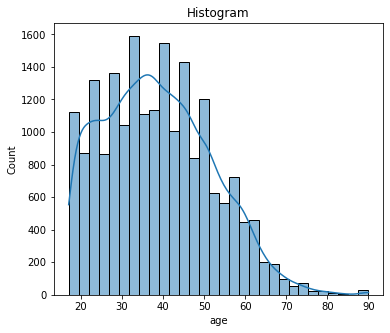

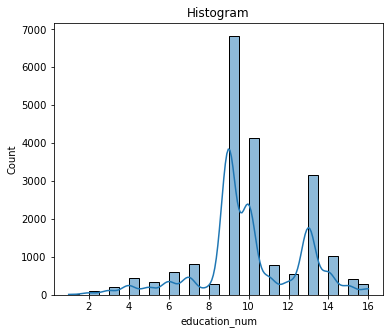

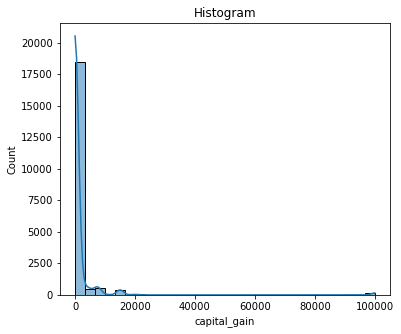

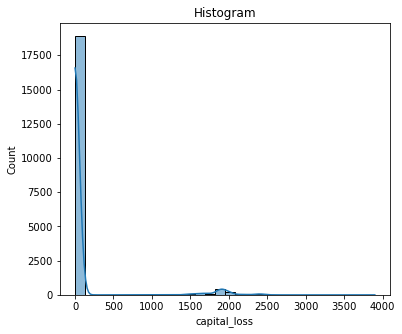

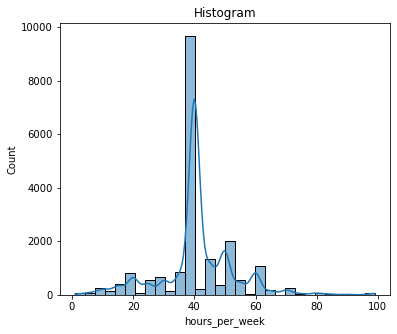

In [205]:
# Visualisasi data kolom numerik
# Membuat fungsi untuk pembuatan histogram

def histogram_plots(df, variable):
    plt.figure(figsize=(13,5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title('Histogram')
    plt.show()

# Membuat grafik histogram

histogram_plots(data, 'age')
histogram_plots(data, 'education_num')
histogram_plots(data, 'capital_gain')
histogram_plots(data, 'capital_loss')
histogram_plots(data, 'hours_per_week')

Berdasarkan grafik histogram di atas, dapat diketahui bahwa data untuk age, capital_gain, dan capital_loss memiliki distribusi yang tidak normal, sehingga data tidak terdistribusi secara merata. Sedangkan data untuk education_num dan hours_per_week memiliki distribusi normal, sehingga data terdistribusi secara merata.

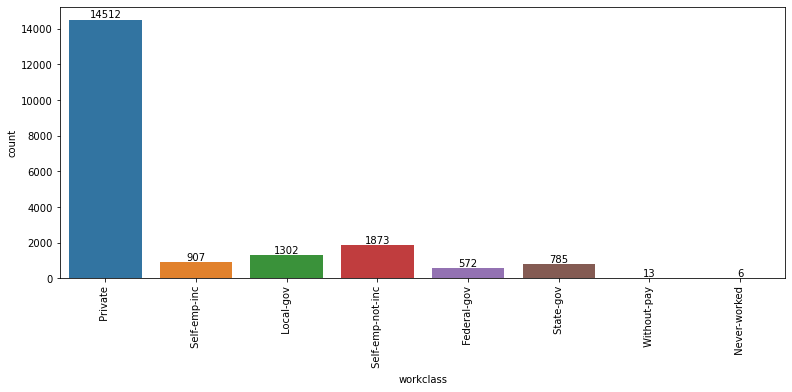

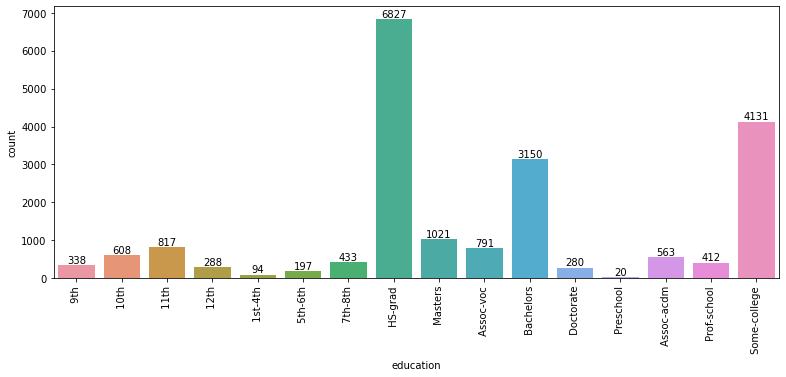

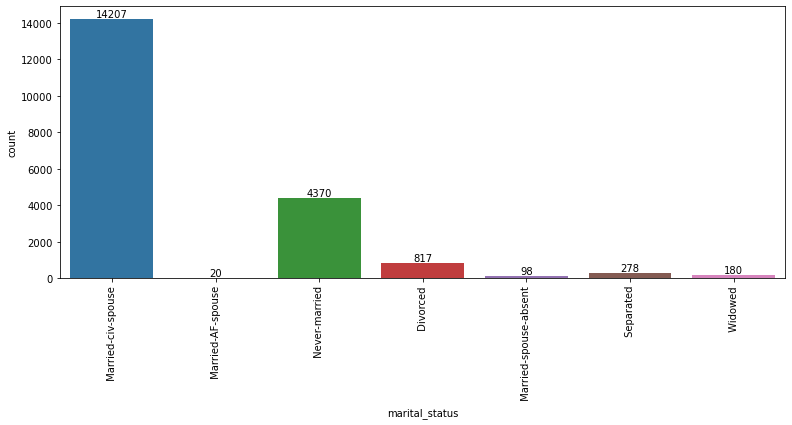

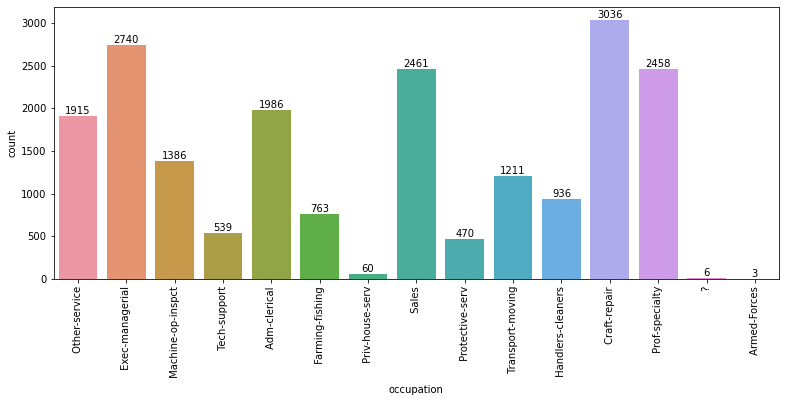

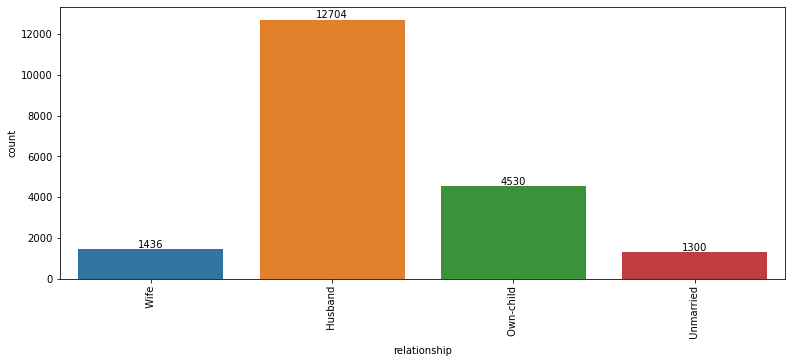

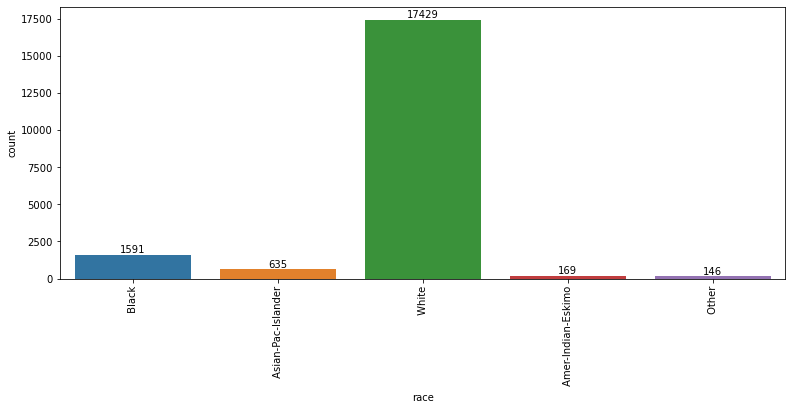

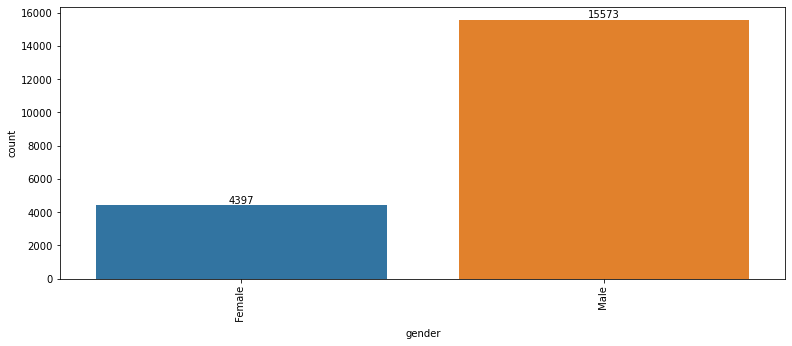

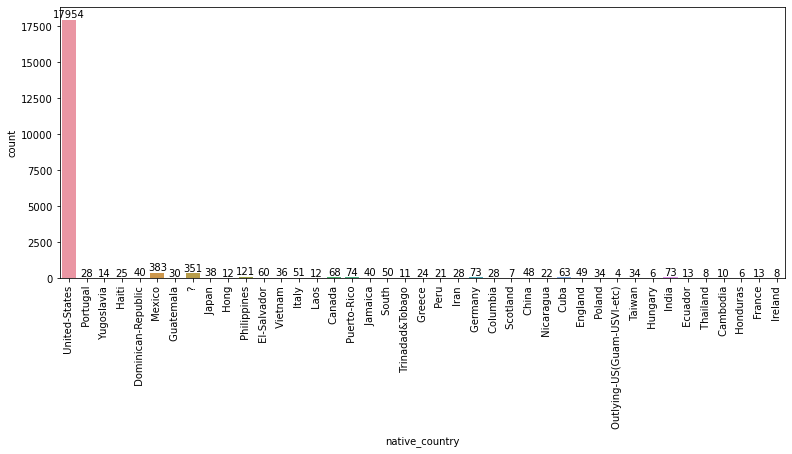

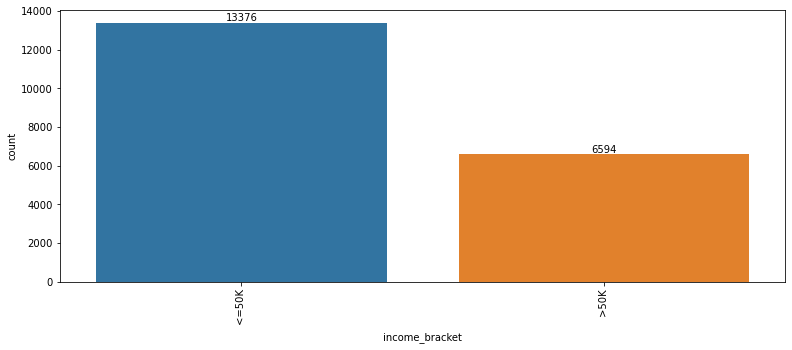

In [23]:
# Visualisasi data kolom kategori
# Membuat fungsi untuk pembuatan countplot

def count_plot(variable,df):
    plt.figure(figsize = (13,5))
    ax = sns.countplot(x=variable, data=df)
    plt.xticks(rotation=90)
    ax.bar_label(ax.containers[0])
    plt.show()

# Membuat grafik countplot

count_plot('workclass', data)
count_plot('education', data)
count_plot('marital_status', data)
count_plot('occupation', data)
count_plot('relationship', data)
count_plot('race', data)
count_plot('gender', data)
count_plot('native_country', data)
count_plot('income_bracket', data)


Berdasarkan grafik countplot di atas, dapat diketahui bahwa jumlah data untuk kolom:
- workclass, yang paling banyak adalah 'Private' dengan jumlah 14512 data.
- education, yang paling banyak adalah 'HS-Grad' dengan jumlah 6827 data.
- marital_status, yang paling banyak adalah 'Married-civ-Spouse' dengan jumlah 14207 data.
- occupation, yang paling banyak adalah 'Craft-repair' dengan jumlah 3036 data.
- relationship, yang paling banyak adalah 'husband' dengan jumlah 12704 data.
- race, yang paling banyak adalah 'white' dengan jumlah 17429 data.
- gender, yang paling banyak adalah 'male' dengan jumlah 15573 data.
- native_country, yang paling banyak adalah 'United States' dengan jumlah 17954 data.
- income_bracket, yang paling banyak '<=50K' dengan jumlah 13376 data.

In [190]:
# Melihat describe data

data.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,19970.000000,19970.000000,19970.000000,19970.000000,19970.000000
mean,38.711267,10.015323,1343.219980,100.286229,41.126039
std,13.185744,2.595189,8516.206541,428.712708,12.442156
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3900.000000,99.000000


Berdasarkan describe di atas, diketahui bahwa dataset ini terdiri dari 19970 baris. Kolom 'age' diisi dengan nilai paling kecil adalah 17 dan paling besar adalah 90. Sedangkan untuk kolom 'education_num' memiliki nilai paling kecil 1 dan paling besar 16. Lalu untuk kolom 'capital_gain' memiliki nilai paling kecil adalah 0, yang berarti belum mendapatkan keuntungan, dan paling besar 99999. Lalu untuk kolom 'capital_loss' memiliki nilai paling kecil 0, yang berarti belum mendapatkan kerugian, dan paling besar 3900. Dan untuk kolom 'hours_per_week' memiliki nilai paling kecil 1 dan paling besar 99.

In [85]:
# Mengubah data kategorik menjadi numerik untuk pembuatan heatmap

data1 = data.copy()
data1 = data1.apply(LabelEncoder().fit_transform)

<AxesSubplot:>

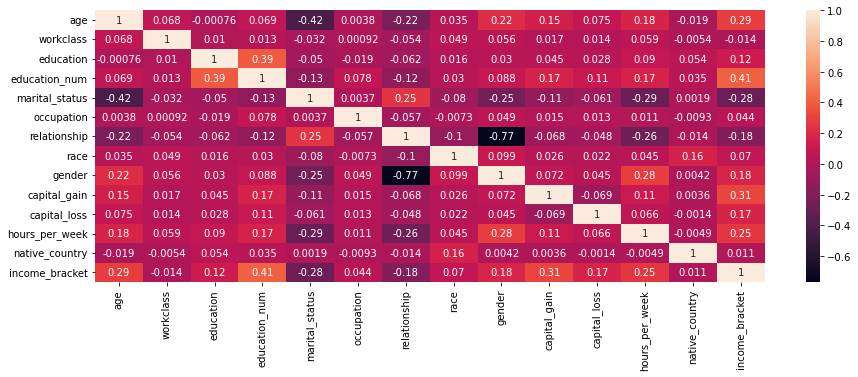

In [84]:
# Pembuatan heatmap untuk melihat korelasi antar variable

plt.figure(figsize = (15, 5))
sns.heatmap(data1.corr(), annot = True)

Berdasarkan heatmap di atas, dapat diketahui bahwa variable yang memiliki tingkat korelasi tinggi dengan 'income_bracket' adalah kolom 'education_num' dengan nilai 0.41, 'capital_gain' dengan nilai 0.31, 'age' dengan nilai 0.29, 'hours_per_week' dengan nilai 0.25, dan 'gender' dengan 0.18. Sedangkan untuk kolom yang memiliki tingkat korelasi terendah dengan 'income_bracket' adalah kolom 'workclass' dengan nilai -0.014.

## V. Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model. Data Preprocessing yang dilakukan adalah:
1. Mengambil data untuk model inference
2. Memisahkan antara X (Features) and y (Target)
3. Handling Data Outlier
4. Handling Missing Values
5. Feature Selection
6. Memisahkan antara kolom Numerikal dan kolom Kategorikal
7. Feature Scaling
8. Feature Encoding
9. Menggabungkan kolom Numerikal dan Kolom Kategorikal

### V.1 Mengambil Data untuk Model Inference

In [24]:
# Get Data for Model Inference

data_inf = data.sample(10, random_state = 17)
data_inf

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
18553,19,State-gov,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
5130,43,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
13228,26,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
12505,37,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,52,United-States,<=50K
6401,38,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
1014,42,Private,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,1887,40,Philippines,>50K
15960,24,Private,HS-grad,9,Never-married,Other-service,Own-child,Black,Male,0,0,40,United-States,<=50K
11896,36,Private,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,52,United-States,<=50K
7718,39,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,65,United-States,>50K
11165,54,Self-emp-not-inc,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K


In [25]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,35,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
19966,42,Private,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K
19967,38,Federal-gov,HS-grad,9,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
19968,42,Private,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Male,0,0,48,United-States,<=50K


In [26]:
# Reset Index

data_train_test.reset_index(drop = True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,19,State-gov,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
1,43,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
2,26,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
3,37,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,52,United-States,<=50K
4,38,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
5,42,Private,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,1887,40,Philippines,>50K
6,24,Private,HS-grad,9,Never-married,Other-service,Own-child,Black,Male,0,0,40,United-States,<=50K
7,36,Private,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,52,United-States,<=50K
8,39,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,65,United-States,>50K
9,54,Self-emp-not-inc,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K


### V.2 Memisahkan antara `X` (Features) dan `y` (Target)

In [27]:
# Split between 'X' (features) and 'y' (target)

X = data_train_test.drop('income_bracket', axis=1)
y = data_train_test['income_bracket']
X

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19955,35,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States
19956,42,Private,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States
19957,38,Federal-gov,HS-grad,9,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States
19958,42,Private,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Male,0,0,48,United-States


In [28]:
# Split antara Train-Set dan Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

print('Train Size   : ', X_train.shape)
print('Test Size    : ', X_test.shape )

Train Size   :  (15968, 13)
Test Size    :  (3992, 13)


### V.3 Handling Data Outlier

In [29]:
# Membuat fungsi untuk pembuatan histogram dan boxplot

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

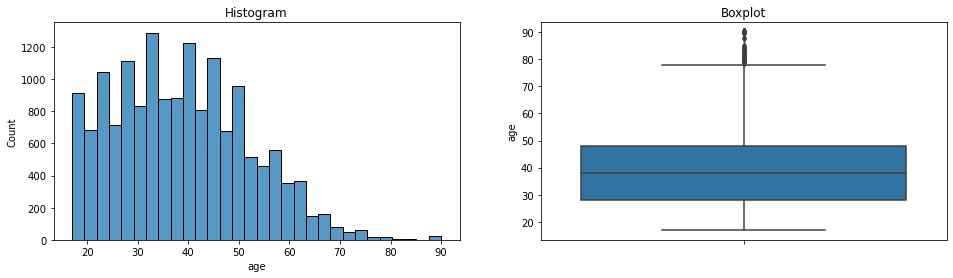


Skewness Value :  0.4317143891519036


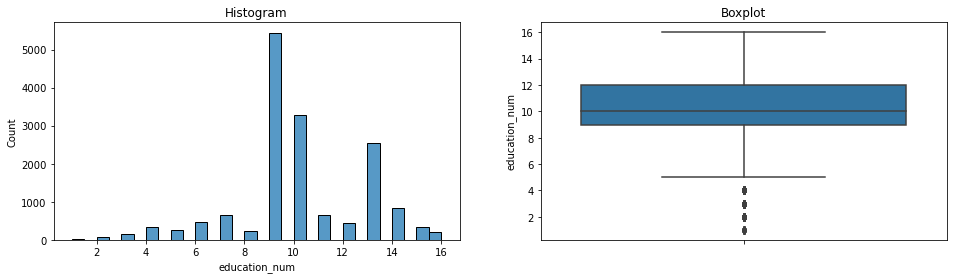


Skewness Value :  -0.2279455019688204


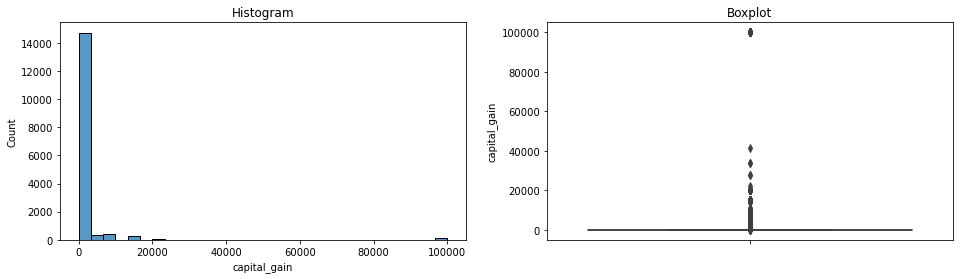


Skewness Value :  10.674386005720027


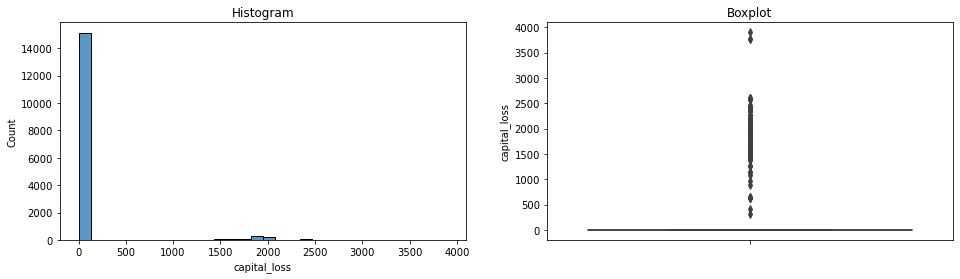


Skewness Value :  4.188075456276991


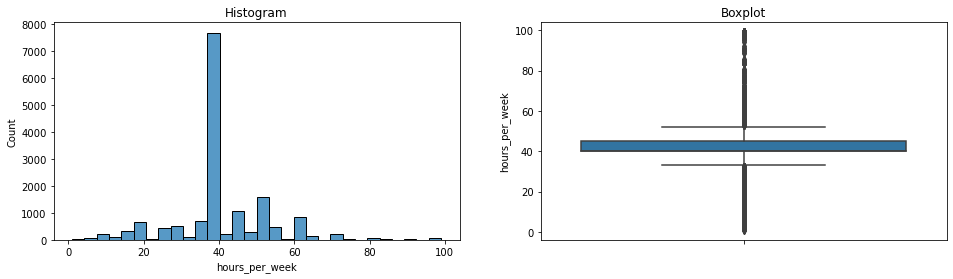


Skewness Value :  0.2774705611275283


In [30]:
# Mengecek apakah terdapat data outlier

diagnostic_plots(X_train, 'age')
print('\nSkewness Value : ', X_train['age'].skew())

diagnostic_plots(X_train, 'education_num')
print('\nSkewness Value : ', X_train['education_num'].skew())

diagnostic_plots(X_train, 'capital_gain')
print('\nSkewness Value : ', X_train['capital_gain'].skew())

diagnostic_plots(X_train, 'capital_loss')
print('\nSkewness Value : ', X_train['capital_loss'].skew())

diagnostic_plots(X_train, 'hours_per_week')
print('\nSkewness Value : ', X_train['hours_per_week'].skew())

In [31]:
# Membuat fungsi untuk menentukan data outlier

def outliers(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR

    ls = df.index[(df[var] < lower_boundary) | (df[var] > upper_boundary)]

    return ls

In [32]:
# Menampilkan indeks yang terdapat data outlier

index_list = []
for i in ['age']:
    index_list.extend(outliers(X_train, 'age'))

index_list

[10768,
 4545,
 11145,
 8505,
 10123,
 5296,
 8812,
 5270,
 9003,
 5835,
 10864,
 4137,
 6439,
 11510,
 2688,
 12488,
 12230,
 4714,
 10719,
 6404,
 2081,
 901,
 11460,
 16867,
 1981,
 1840,
 8133,
 2923,
 5174,
 19029,
 6743,
 7053,
 9908,
 2814,
 11596,
 6836,
 12339,
 646,
 17319,
 12571,
 2343,
 16409,
 8815,
 8090,
 2731,
 19707,
 19875,
 1973,
 19108,
 5520,
 1738]

In [33]:
# Membuat fungsi untuk menghapus data outlier

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [34]:
# Menghapus data outlier

X_train_cln = remove(X_train, index_list)

print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', X_train_cln.shape)

Size dataset - Before trimming :  (15968, 13)
Size dataset - After trimming  :  (15917, 13)


Age - After Trimming


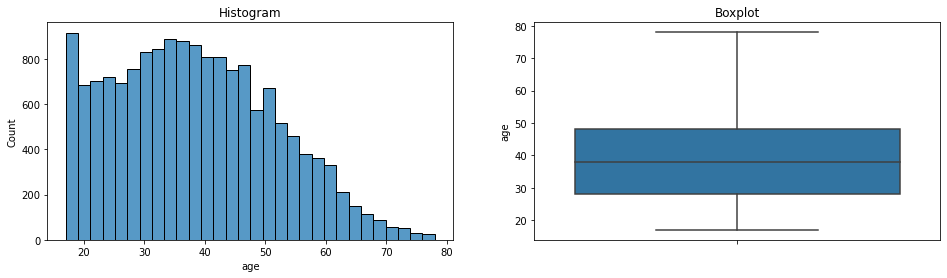


Skewness Value :  0.3423630271799618


In [35]:
# Visualisasi data variable 'age' setelah outlier dihilangkan

print('Age - After Trimming')
diagnostic_plots(X_train_cln, 'age')
print('\nSkewness Value : ', X_train_cln['age'].skew())

In [72]:
# Menghapus indeks outlier pada y_train

y_train_cln = remove(y_train, index_list)

print('Size dataset - Before trimming : ', y_train.shape)
print('Size dataset - After trimming  : ', y_train_cln.shape)

Size dataset - Before trimming :  (15968,)
Size dataset - After trimming  :  (15917,)


### V.4 Handling Missing Values
Pada bagian ini akan dilakukan pengecekan missing value. Pada bagian EDA, diketahui bahwa pada kolom 'occupation' dan 'native_country' terdapat data yang memiliki nilai ' ?', yang menandakan data tersebut merupakan missing value. Maka data ' ?' harus diubah menjadi 'NaN' agar terdeteksi sebagai missing value.

In [37]:
# Mengubah ' ?' sebagai missing value

X_train_cln[X_train_cln == ' ?'] = np.nan

In [38]:
# Mengecek jumlah missing value pada X_train_cln

X_train_cln.isnull().sum()

age                 0
workclass           0
education           0
education_num       0
marital_status      0
occupation          4
relationship        0
race                0
gender              0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    288
dtype: int64

In [39]:
# Menangani missing value pada X_train_cln dengan melakukan imputasi modus

modus_occ = X_train_cln['occupation'].mode()[0]
X_train_cln['occupation'] = X_train_cln['occupation'].fillna(modus_occ)

modus_nc = X_train_cln['native_country'].mode()[0]
X_train_cln['native_country'] = X_train_cln['native_country'].fillna(modus_nc)

# Mengecek kembali jumlah missing value pada X_train_cln

X_train_cln.isnull().sum()


age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [40]:
# Mengubah ' ?' sebagai missing value

X_test[X_test == ' ?'] = np.nan

In [41]:
# Mengecek jumlah missing value pada X_test

X_test.isnull().sum()

age                0
workclass          0
education          0
education_num      0
marital_status     0
occupation         2
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country    63
dtype: int64

In [42]:
# Menangani missing value pada X_test dengan melakukan imputasi modus

modus_occ = X_test['occupation'].mode()[0]
X_test['occupation'] = X_test['occupation'].fillna(modus_occ)

modus_nc = X_test['native_country'].mode()[0]
X_test['native_country'] = X_test['native_country'].fillna(modus_nc)

# Mengecek kembali jumlah missing value pada X_test

X_test.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [73]:
# Mengecek jumlah missing value pada y_train

y_train_cln.isnull().sum()

0

In [44]:
# Mengecek jumlah missing value pada y_test

y_test.isnull().sum()

0

### V.5 Feature Selection

In [45]:
# Menampilkan data X_train

X_train_cln

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
8432,58,Private,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States
3828,44,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,40,United-States
15982,33,Private,HS-grad,9,Divorced,Other-service,Own-child,White,Female,0,0,40,United-States
10954,47,Self-emp-not-inc,Doctorate,16,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2002,45,United-States
16789,24,Private,Bachelors,13,Never-married,Sales,Own-child,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9529,35,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,16,United-States
406,44,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Wife,White,Female,3137,0,30,United-States
13702,66,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,7,United-States
2191,23,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,Mexico


Berdasarkan korelasi antar variable pada bagian EDA, kolom yang memiliki pengaruh besar terhadap `income_bracket` adalah kolom:
- `age`, dengan nilai 0.29
- `education_num`, dengan nilai 0.41
- `capital_gain`, dengan nilai 0.31
- `hours_per_week`, dengan nilai 0.25
- `gender`, dengan nilai 0.18

Maka, selain kelima kolom tersebut, kolom-kolom lainnya akan dihapus.


In [76]:
# Menghapus kolom-kolom yang tidak digunakan pada X_train

X_train_cln = X_train_cln[['age', 'education_num', 'capital_gain', 'hours_per_week', 'gender']]
X_train_cln

,age,education_num,capital_gain,hours_per_week,gender
8432,58,13,0,40,Male
3828,44,9,0,40,Male
15982,33,9,0,40,Female
10954,47,16,0,45,Male
16789,24,13,0,40,Female
...,...,...,...,...,...
9529,35,13,0,16,Male
406,44,9,3137,30,Female
13702,66,10,0,7,Male
2191,23,7,0,40,Male


In [77]:
# Menghapus kolom-kolom yang tidak digunakan pada X_test

X_test = X_test[['age', 'education_num', 'capital_gain', 'hours_per_week', 'gender']]
X_test

,age,education_num,capital_gain,hours_per_week,gender
15083,27,9,0,40,Male
4295,73,9,0,30,Male
6209,36,9,0,60,Male
14114,37,10,0,50,Male
13849,48,10,0,40,Male
...,...,...,...,...,...
7980,31,11,0,38,Male
16243,27,9,0,37,Male
17930,25,10,0,40,Male
14845,19,8,0,25,Male


### V.6 Memisahkan Kolom Numerikal dan Kolom Kategorikal

In [80]:
# Mendapatkan kolom numerikan dan kolom kategorikal

num_columns = X_train_cln.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_cln.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns di X_train   : ', num_columns)
print('\nCategorical Columns di X_train : ', cat_columns)

num_columns1 = X_test.select_dtypes(include=np.number).columns.tolist()
cat_columns1 = X_test.select_dtypes(include=['object']).columns.tolist()

print('\nNumerical Columns di X_test    : ', num_columns1)
print('\nCategorical Columns di X_test  : ', cat_columns1)

Numerical Columns di X_train   :  ['age', 'education_num', 'capital_gain', 'hours_per_week']

Categorical Columns di X_train :  ['gender']

Numerical Columns di X_test    :  ['age', 'education_num', 'capital_gain', 'hours_per_week']

Categorical Columns di X_test  :  ['gender']


In [81]:
# Memisahkan Train-set dan Test-set berdasarkan tipe kolom

X_train_num = X_train_cln[num_columns]
X_train_cat = X_train_cln[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_test_num

,age,education_num,capital_gain,hours_per_week
15083,27,9,0,40
4295,73,9,0,30
6209,36,9,0,60
14114,37,10,0,50
13849,48,10,0,40
...,...,...,...,...
7980,31,11,0,38
16243,27,9,0,37
17930,25,10,0,40
14845,19,8,0,25


### V.7 Feature Scaling
Pada bagian ini akan dilakukan scaling untuk kolom numerik. Scaling yang akan digunakan adalah MinMaxScaler, karena MinMaxScaler mempertahankan bentuk distribusi data aslinya. MinMaxScaler akan mengubah data berada di rentang 0 sampai 1.

In [86]:
# Feature Scaling menggunakan MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.67213115, 0.8       , 0.        , 0.39795918],
       [0.44262295, 0.53333333, 0.        , 0.39795918],
       [0.26229508, 0.53333333, 0.        , 0.39795918],
       ...,
       [0.80327869, 0.6       , 0.        , 0.06122449],
       [0.09836066, 0.4       , 0.        , 0.39795918],
       [0.50819672, 1.        , 0.        , 0.5       ]])

### V.8 Feature Encoding
Pada bagian ini akan dilakukan encoding untuk kolom kategori. Encoding yang digunakan adalah Label Encoder, karena label encoder memberikan akurasi yang lebih tinggi dan tidak mengkonsumsi memori yang banyak. Label Encoder akan merubah data kategorik menjadi numerik.

In [210]:
# Feature Encoding menggunakan Label Encoding untuk X_train dan X_test

encoder = LabelEncoder()
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_train_cat_encoded = X_train_cat_encoded[:, np.newaxis]
X_test_cat_encoded = encoder.fit_transform(X_test_cat)
X_test_cat_encoded = X_test_cat_encoded[:, np.newaxis]

X_train_cat_encoded

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [97]:
# Feature Encoding menggunakan Label Encoding untuk y_train dan y_test

labelencoder = LabelEncoder()
y_train_encoded = labelencoder.fit_transform(y_train_cln)
y_train_encoded = y_train_encoded[:, np.newaxis]
y_test_encoded = labelencoder.fit_transform(y_test)
y_test_encoded = y_test_encoded[:, np.newaxis]

y_train_encoded

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

### V.9 Menggabungkan Kolom Numerikal dengan Kolom Kategorikal

In [100]:
# Menggabungkan kolom numerikal dan kategorikal

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[0.67213115, 0.8       , 0.        , 0.39795918, 1.        ],
       [0.44262295, 0.53333333, 0.        , 0.39795918, 1.        ],
       [0.26229508, 0.53333333, 0.        , 0.39795918, 0.        ],
       ...,
       [0.80327869, 0.6       , 0.        , 0.06122449, 1.        ],
       [0.09836066, 0.4       , 0.        , 0.39795918, 1.        ],
       [0.50819672, 1.        , 0.        , 0.5       , 1.        ]])

In [101]:
# Membuat dataframe baru, X_train_final_df

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,age,education_num,capital_gain,hours_per_week,gender
0,0.672131,0.800000,0.00000,0.397959,1.0
1,0.442623,0.533333,0.00000,0.397959,1.0
2,0.262295,0.533333,0.00000,0.397959,0.0
3,0.491803,1.000000,0.00000,0.448980,1.0
4,0.114754,0.800000,0.00000,0.397959,0.0
...,...,...,...,...,...
15912,0.295082,0.800000,0.00000,0.153061,1.0
15913,0.442623,0.533333,0.03137,0.295918,0.0
15914,0.803279,0.600000,0.00000,0.061224,1.0
15915,0.098361,0.400000,0.00000,0.397959,1.0


In [102]:
# Membuat dataframe baru, X_test_final_df

X_test_final_df = pd.DataFrame(X_test_final, columns=[num_columns + cat_columns])
X_test_final_df

,age,education_num,capital_gain,hours_per_week,gender
0,0.163934,0.533333,0.0,0.397959,1.0
1,0.918033,0.533333,0.0,0.295918,1.0
2,0.311475,0.533333,0.0,0.602041,1.0
3,0.327869,0.600000,0.0,0.500000,1.0
4,0.508197,0.600000,0.0,0.397959,1.0
...,...,...,...,...,...
3987,0.229508,0.666667,0.0,0.377551,1.0
3988,0.163934,0.533333,0.0,0.367347,1.0
3989,0.131148,0.600000,0.0,0.397959,1.0
3990,0.032787,0.466667,0.0,0.244898,1.0


## VI. Model Definition

In [103]:
# Definisi model yang digunakan

model_log_reg = LogisticRegression()

In [211]:
# Definisi model dan kernel yang digunakan

model_SVM = SVC(kernel='rbf',C=1,degree=2,coef0=1)

Algoritma yang dipakai adalah Logistic Regression, karena pada model ini data target yang digunakan adalah data kategori, yaitu income_bracket, dengan nilai '<=50K' dan '>50K' dan algoritma lainnya yang dipakai adalah SVM, karena model SVM memberikan nilai akurasi yang lebih tinggi, dan kernel yang digunakan adalah RBF, karena dataset ini tidak linear.

## VII. Model Training

In [105]:
# Melakukan model training

model_log_reg.fit(X_train_final, y_train_cln)

LogisticRegression()

In [213]:
# Melakukan model training

model_SVM.fit(X_train_final, y_train_cln)

SVC(C=1, coef0=1, degree=2)

## VIII. Model Evaluation
---
### Logistic Regression

In [106]:
# Melakukan prediksi pada train-set dan test-set dengan logistic regression

y_pred_train = model_log_reg.predict(X_train_final)
y_pred_test = model_log_reg.predict(X_test_final)

#Data y_pred_train

y_pred_train

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [236]:
# Data y_pred_test

y_pred_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [235]:
# Melihat akurasi dari train-set dan test-set

print('accuracy score train : ',accuracy_score(y_train_cln,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test))

accuracy score train :  0.7776591066155683
accuracy score test :  0.7833166332665331


In [111]:
# Melihat kelas

model_log_reg.classes_

array([' <=50K', ' >50K'], dtype=object)

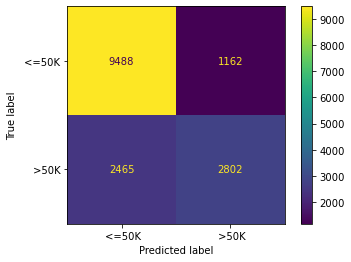

In [113]:
# Confusion matrix untuk data train

cm = confusion_matrix(y_train_cln, y_pred_train, labels=model_log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_log_reg.classes_)

disp.plot()
plt.show()

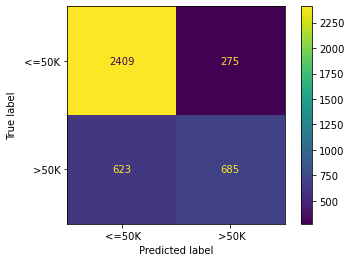

In [114]:
# Confusion matrix untuk data test

cm = confusion_matrix(y_test, y_pred_test, labels=model_log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_log_reg.classes_)

disp.plot()
plt.show()

In [117]:
# Classification report pada data train

print(classification_report(y_train_cln,y_pred_train))

              precision    recall  f1-score   support

       <=50K       0.79      0.89      0.84     10650
        >50K       0.71      0.53      0.61      5267

    accuracy                           0.77     15917
   macro avg       0.75      0.71      0.72     15917
weighted avg       0.77      0.77      0.76     15917



In [115]:
# Classification report pada data test

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

       <=50K       0.79      0.90      0.84      2684
        >50K       0.71      0.52      0.60      1308

    accuracy                           0.78      3992
   macro avg       0.75      0.71      0.72      3992
weighted avg       0.77      0.78      0.76      3992



Berdasarkan data di atas, diketahui bahwa nilai accuracy untuk data train adalah 0.77 dan untuk data test adalah 0.78. Semakin nilai accuracy mendekati 1, maka semakin bagus. Lalu berdasarkan classification report pada data train, kategori '<=50K' memiliki nilai 79% persen untuk precision dan 89% untuk recall. Sedangkan untuk kategori '>50K' memiliki nilai 71% untuk precision dan 53% untuk recall. Lalu untuk classification report pada data test, kategori '<=50K' memiliki nilai 79% persen untuk precision dan 90% untuk recall. Sedangkan untuk kategori '>50K' memiliki nilai 71% untuk precision dan 52% untuk recall.

---
### SVM

In [218]:
# Melakukan prediksi pada train-set dan test-set dengan SVM

y_pred_train1 = model_SVM.predict(X_train_final)
y_pred_test1 = model_SVM.predict(X_test_final)

#Data y_pred_train

y_pred_train1

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [219]:
# Data y_pred_test

y_pred_test1

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [220]:
# Classification report pada data train

print(classification_report(y_train_cln,y_pred_train1))

              precision    recall  f1-score   support

       <=50K       0.80      0.91      0.85     10650
        >50K       0.75      0.53      0.62      5267

    accuracy                           0.78     15917
   macro avg       0.77      0.72      0.73     15917
weighted avg       0.78      0.78      0.77     15917



In [221]:
# Classification report pada data test

print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

       <=50K       0.80      0.92      0.86      2684
        >50K       0.77      0.52      0.62      1308

    accuracy                           0.79      3992
   macro avg       0.78      0.72      0.74      3992
weighted avg       0.79      0.79      0.78      3992



Berdasarkan data di atas, classification report pada data train, kategori '<=50K' memiliki nilai 80% persen untuk precision dan 91% untuk recall. Sedangkan untuk kategori '>50K' memiliki nilai 75% untuk precision dan 53% untuk recall. Lalu untuk classification report pada data test, kategori '<=50K' memiliki nilai 80% persen untuk precision dan 92% untuk recall. Sedangkan untuk kategori '>50K' memiliki nilai 77% untuk precision dan 52% untuk recall.

In [222]:
# Save file untuk data inference

with open('model_SVM.pkl', 'wb') as file_0:
    joblib.dump(model_SVM, file_0)

with open('model_log_reg.pkl', 'wb') as file_1:
    joblib.dump(model_log_reg, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
    joblib.dump(scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
    joblib.dump(encoder, file_3)

with open('list_num_cols.txt', 'w') as file_4:
    json.dump(num_columns, file_4)

with open('list_cat_columns.txt', 'w') as file_5:
    json.dump(cat_columns, file_5)

## IX. Model Inference

In [223]:
# Mengakses file yang telah di-save untuk data inference

with open('model_SVM.pkl', 'rb') as file_0:
    model_SVM = joblib.load(file_0)

with open('model_log_reg.pkl', 'rb') as file_1:
    model_log_reg = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
    model_scaler = joblib.load(file_2)

with open('model_encoder.pkl', 'rb') as file_3:
    model_encoder = joblib.load(file_3)

with open('list_num_cols.txt', 'r') as file_4:
    list_num_cols = json.load(file_4)

with open('list_cat_columns.txt', 'rb') as file_5:
    list_cat_columns = json.load(file_5)

In [224]:
# Menampilkan data inference-set

data_inf

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,19,State-gov,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
1,43,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
2,26,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
3,37,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,52,United-States,<=50K
4,38,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
5,42,Private,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,1887,40,Philippines,>50K
6,24,Private,HS-grad,9,Never-married,Other-service,Own-child,Black,Male,0,0,40,United-States,<=50K
7,36,Private,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,52,United-States,<=50K
8,39,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,65,United-States,>50K
9,54,Self-emp-not-inc,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K


In [225]:
# Memisahkan antara Kolom Numerikal dan Kolom Kategorikal

data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_columns]

# Data data_inf_num

data_inf_num

,age,education_num,capital_gain,hours_per_week
0,19,10,0,10
1,43,9,0,40
2,26,10,0,40
3,37,10,0,52
4,38,9,0,40
5,42,13,0,40
6,24,9,0,40
7,36,10,0,52
8,39,14,7688,65
9,54,12,0,50


In [226]:
# Data data_inf_cat

data_inf_cat

,gender
0,Female
1,Male
2,Male
3,Male
4,Male
5,Female
6,Male
7,Male
8,Male
9,Male


In [227]:
# Feature Scaling dan Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat)
data_inf_cat_encoded = data_inf_cat_encoded[:, np.newaxis]

# Menampilkan data yang telah di-scaling

data_inf_num_scaled

array([[0.03278689, 0.6       , 0.        , 0.09183673],
       [0.42622951, 0.53333333, 0.        , 0.39795918],
       [0.14754098, 0.6       , 0.        , 0.39795918],
       [0.32786885, 0.6       , 0.        , 0.52040816],
       [0.3442623 , 0.53333333, 0.        , 0.39795918],
       [0.40983607, 0.8       , 0.        , 0.39795918],
       [0.1147541 , 0.53333333, 0.        , 0.39795918],
       [0.31147541, 0.6       , 0.        , 0.52040816],
       [0.36065574, 0.86666667, 0.07688077, 0.65306122],
       [0.60655738, 0.73333333, 0.        , 0.5       ]])

In [228]:
# Menampilkan data yang telah di-encoding

data_inf_cat_encoded

array([[0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]])

In [229]:
# Menggabungkan Kolom Numerikal dan Kolom Kategorikal

data_inf_final = np.concatenate ([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
data_inf_final

array([[0.03278689, 0.6       , 0.        , 0.09183673, 0.        ],
       [0.42622951, 0.53333333, 0.        , 0.39795918, 1.        ],
       [0.14754098, 0.6       , 0.        , 0.39795918, 1.        ],
       [0.32786885, 0.6       , 0.        , 0.52040816, 1.        ],
       [0.3442623 , 0.53333333, 0.        , 0.39795918, 1.        ],
       [0.40983607, 0.8       , 0.        , 0.39795918, 0.        ],
       [0.1147541 , 0.53333333, 0.        , 0.39795918, 1.        ],
       [0.31147541, 0.6       , 0.        , 0.52040816, 1.        ],
       [0.36065574, 0.86666667, 0.07688077, 0.65306122, 1.        ],
       [0.60655738, 0.73333333, 0.        , 0.5       , 1.        ]])

In [230]:
# Melakukan prediksi dengan Logistic Regression

y_pred_inf = model_log_reg.predict(data_inf_final)
y_pred_inf

array([' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' >50K', ' >50K'], dtype=object)

In [231]:
# Melakukan prediksi dengan SVM

y_pred_inf1 = model_SVM.predict(data_inf_final)
y_pred_inf1

array([' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K',
       ' <=50K', ' <=50K', ' >50K', ' >50K'], dtype=object)

In [232]:
# Membuat dataframe hasil Income Bracket Logistic Regression

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns= ['Income Bracket Logistic Regression'])
y_pred_inf_df

,Income Bracket Logistic Regression
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
5,<=50K
6,<=50K
7,<=50K
8,>50K
9,>50K


In [233]:
# Membuat dataframe hasil Income Bracket Prediction

y_pred_inf1_df = pd.DataFrame(y_pred_inf, columns= ['Income Bracket SVM'])
y_pred_inf1_df

,Income Bracket SVM
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
5,<=50K
6,<=50K
7,<=50K
8,>50K
9,>50K


In [234]:
# Menggabungkan data inference-set dengan Income Bracket prediction

df_akhir = pd.concat([data_inf, y_pred_inf_df, y_pred_inf1_df], axis=1)
df_akhir

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,Income Bracket Logistic Regression,Income Bracket SVM
0,19,State-gov,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K,<=50K,<=50K
1,43,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K,<=50K,<=50K
2,26,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K,<=50K,<=50K
3,37,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,52,United-States,<=50K,<=50K,<=50K
4,38,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,<=50K,<=50K
5,42,Private,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,1887,40,Philippines,>50K,<=50K,<=50K
6,24,Private,HS-grad,9,Never-married,Other-service,Own-child,Black,Male,0,0,40,United-States,<=50K,<=50K,<=50K
7,36,Private,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,52,United-States,<=50K,<=50K,<=50K
8,39,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,65,United-States,>50K,>50K,>50K
9,54,Self-emp-not-inc,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K,>50K,>50K


In [238]:
df_akhir[['income_bracket', 'Income Bracket Logistic Regression', 'Income Bracket SVM']]

,income_bracket,Income Bracket Logistic Regression,Income Bracket SVM
0,<=50K,<=50K,<=50K
1,>50K,<=50K,<=50K
2,>50K,<=50K,<=50K
3,<=50K,<=50K,<=50K
4,<=50K,<=50K,<=50K
5,>50K,<=50K,<=50K
6,<=50K,<=50K,<=50K
7,<=50K,<=50K,<=50K
8,>50K,>50K,>50K
9,>50K,>50K,>50K


Berdasarkan data di atas, diketahui terdapat perbedaan antara nilai aktual income_bracket dengan nilai prediksi income_bracket. Hal ini bisa disebabkan oleh nilai error dan adanya kesalahan dalam penentuan variabel independen dan variabel dependen yang digunakan untuk analisis.

## X. Pengambilan Kesimpulan

Berdasarkan data di atas, dapat disimpulkan bahwa:
- Dataset ini terdiri dari 19970 baris dan 14 kolom. Dataset ini memiliki data type int64 dan object serta memakan memori sebsar 2.1 MB.
- Data untuk age, capital_gain, dan capital_loss memiliki distribusi yang tidak normal, sehingga data tidak terdistribusi secara merata. Sedangkan data untuk education_num dan hours_per_week memiliki distribusi normal, sehingga data terdistribusi secara merata.
- Variable yang memiliki tingkat korelasi tinggi dengan 'income_bracket' adalah kolom 'education_num' dengan nilai 0.41, 'capital_gain' dengan nilai 0.31, 'age' dengan nilai 0.29, 'hours_per_week' dengan nilai 0.25, dan 'gender' dengan 0.18. Sedangkan untuk kolom yang memiliki tingkat korelasi terendah dengan 'income_bracket' adalah kolom 'workclass' dengan nilai -0.014.
- Dengan menggunakan logistic regression, nilai accuracy untuk data train adalah 0.77 dan untuk data test adalah 0.78. Semakin nilai accuracy mendekati 1, maka semakin bagus. Lalu berdasarkan classification report pada data train, kategori '<=50K' memiliki nilai 79% persen untuk precision dan 89% untuk recall. Sedangkan untuk kategori '>50K' memiliki nilai 71% untuk precision dan 53% untuk recall. Lalu untuk classification report pada data test, kategori '<=50K' memiliki nilai 79% persen untuk precision dan 90% untuk recall. Sedangkan untuk kategori '>50K' memiliki nilai 71% untuk precision dan 52% untuk recall.
- Dengan menggunakan SVM, classification report pada data train, kategori '<=50K' memiliki nilai 80% persen untuk precision dan 91% untuk recall. Sedangkan untuk kategori '>50K' memiliki nilai 75% untuk precision dan 53% untuk recall. Lalu untuk classification report pada data test, kategori '<=50K' memiliki nilai 80% persen untuk precision dan 92% untuk recall. Sedangkan untuk kategori '>50K' memiliki nilai 77% untuk precision dan 52% untuk recall.
- Berdasarkan hasil pengujian, diketahui terdapat perbedaan antara nilai aktual income_bracket dengan nilai prediksi income_bracket. Hal ini bisa disebabkan oleh nilai error dan adanya kesalahan dalam penentuan variabel independen dan variabel dependen yang digunakan untuk analisis.

---
## Conceptual Problems
1. Apakah yang dimaksud dengan coeficient pada logistic regression?
    <p align = "justify"> Coefficient pada logistic regression menyatakan hubungan searah atau berbalik arah antara variabel independen dan variabel dependen. Jika coefficient bernilai positif, maka hubungan antara kedua variabel tersebut adalah searah. Sedangkan jika coefficient bernilai negatif, maka hubungan antara variabel independen dan variabel dependen adalah berbalik arah. </p>

2. Apakah yang dimaksud dengan Support Vector pada SVM?
    <p align = "justify">Support vector pada SVM adalah titik data atau vektor yang paling dekat dengan hyperplane dan yang mempengaruhi posisi hyperplane.Karena vektor-vektor ini mendukung hyperplane, maka disebut support vector.</p>
    
3. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!

    <p align = "justify"> Kernel pada SVM digunakan untuk memetakan data non-linear berdimensi rendah dan mengubahnya ke dalam ruang dimensi yang lebih tinggi. Tujuannya adalah untuk mempermudah pengklasifikasian data dengan menemukan hyperplane yang dapat memisahkan dataset secara linear dengan baik. Kernel terbagi menjadi linear, polynomial, dan RBF (Radial Basic Function).</p>
    <p align = "justify"> Kernel RBF adalah kernel yang paling banyak digunakan karena tingginya nilai akurasi. Kernel RBF digunakan untuk dataset yang tidak terpisah secara linear.</p>

